In [ ]:
!git clone https://github.com/RoehrichLukas/ponds_ERSU_jf_20251106
%cd ponds_ERSU_jf_20251106

In [ ]:
pip install -e .

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 26.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 26.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [cartopy]m4/5 [cartopy]
Note: you may need to restart the kernel to use updated packages.


# PONDS - a 'feuchtfröhliches' Coding Adventure

In [1]:
# Prerequisites
import matplotlib.pyplot as plt
#import numpy as np

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (12, 5)

## Creating a PONDS object is easy!

In [2]:
from ponds.core import PONDS

lat_size = 100
lon_size = 200
time_size = 500

pd = PONDS(
    lat_size=lat_size,
    lon_size=lon_size,
    time_size=time_size,
)

#fig1, ax1 = pd.worldmap(
#    show_cells=True,
#)
#fig2, ax2 = pd.plot_all_ts()

In the plots above we can see the granularity of the world-spanning grid and an example set of the time series of some cells. The y-axis of the second plot shows the value of the arbitrary observable. As we are dealing with synthetic data, we want to leave it abstract like that. The default value is 0 and because we have not done anything with our cells yet, we only see a flat line.

## Let's fill it with some life

### Background Features


First we want to add some background features like an overall postive trend of the observable and some white noise.

In [3]:
from ponds import WhiteNoise, Trend

background_noise = 0.05
background_trend = 0.002
background_intercept = 2.5
time_size = 200

pd.add_background(
    background_method=WhiteNoise(
        magnitude=background_noise,
        background_seed=1,
    )
)
pd.add_background(
    background_method=Trend(
        slope=background_trend,
        intercept=background_intercept,
    )
)

#fig2, ax2 = pd.plot_all_ts()

### Adding a Shift Events

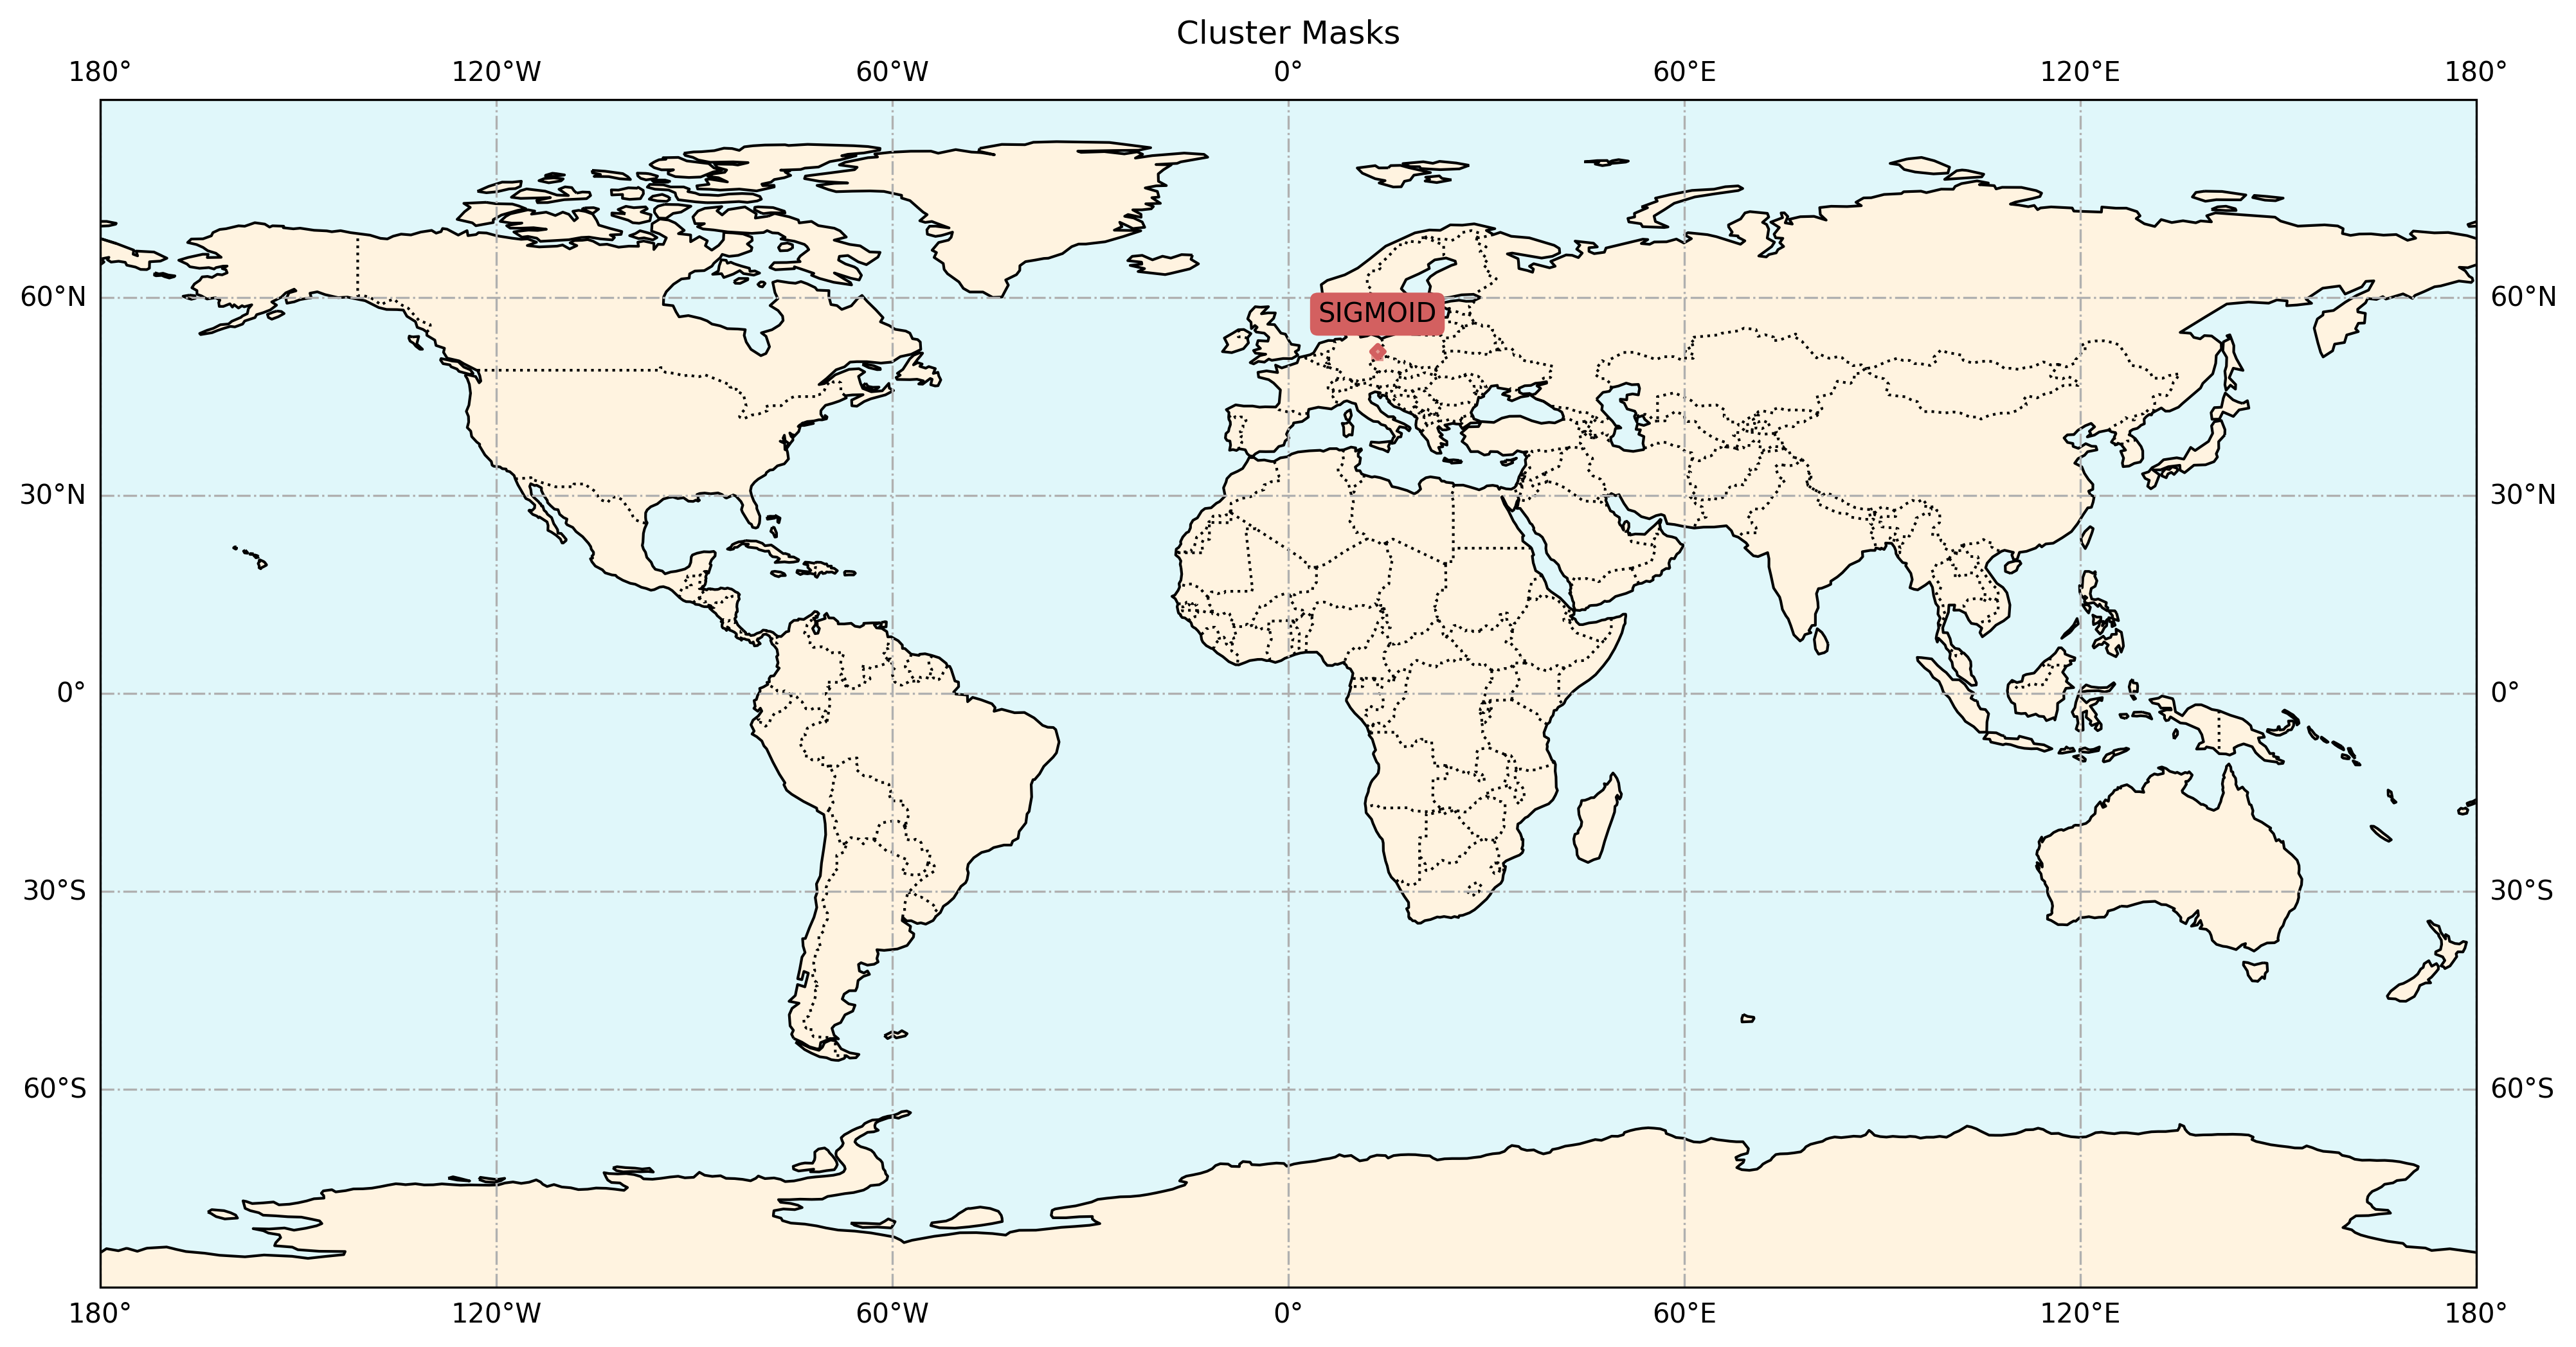

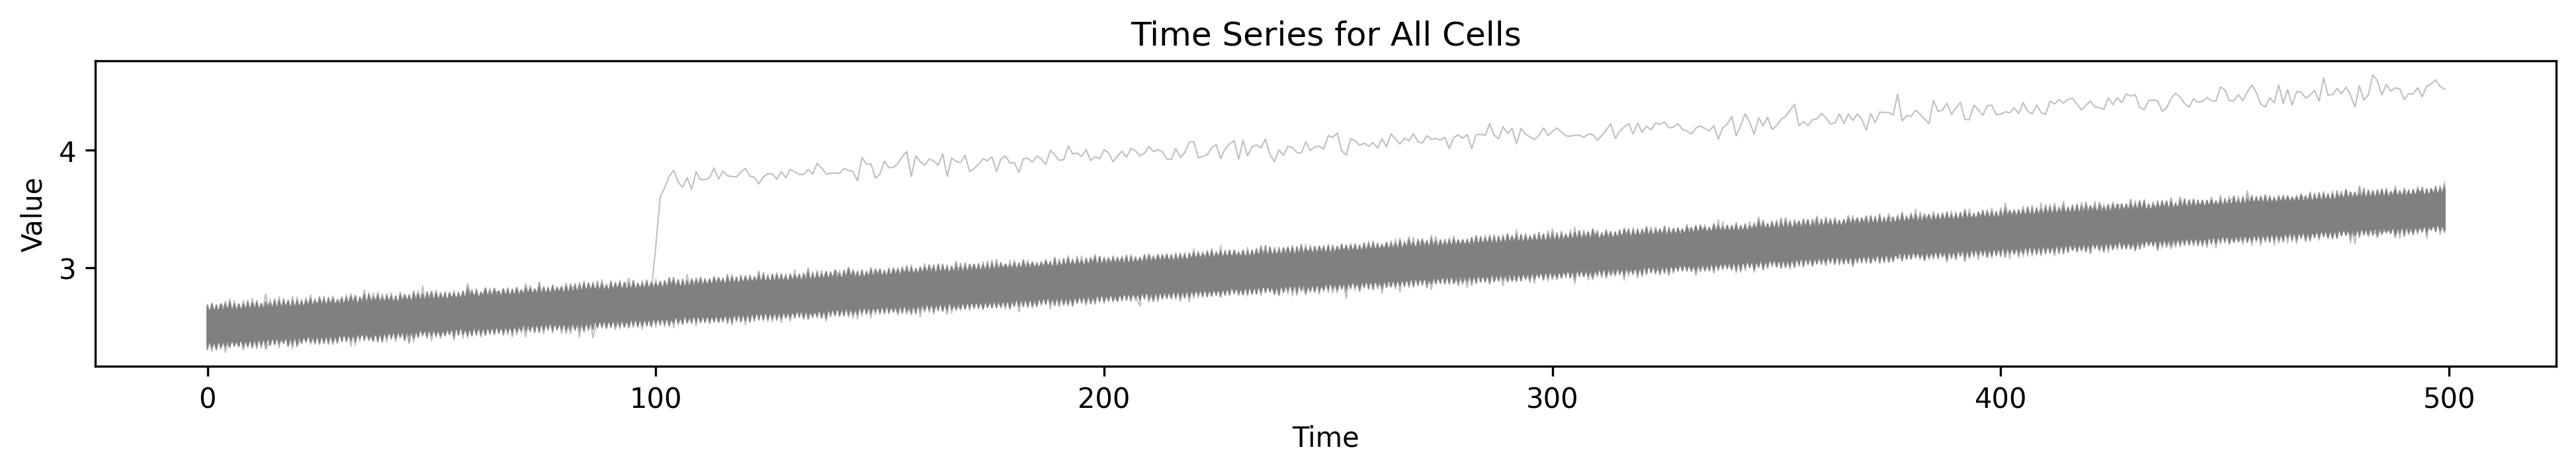

In [ ]:
from ponds import SIGMOID, CELL

center_lat = 52.5
center_lon = 13.5
central_time = 100

pd.add_shift(
    shape_method=CELL(
        center_lat=center_lat,
        center_lon=center_lon,
    ),
    shift_method=SIGMOID(
        central_time=100,
        shift_seed=1,
    ),
)

fig1, ax1 = pd.worldmap(
    shift_type=True,
)
#fig2, ax2 = pd.plot_all_ts()

The little dot in central Europe is the single cell we added a shift event to. In the second plot, we can see the shift event at the given central time.

---

This single-cell shift event is very localized and rather unrealistic. So we want to add a shift event, mimicking a more realistic scenario:

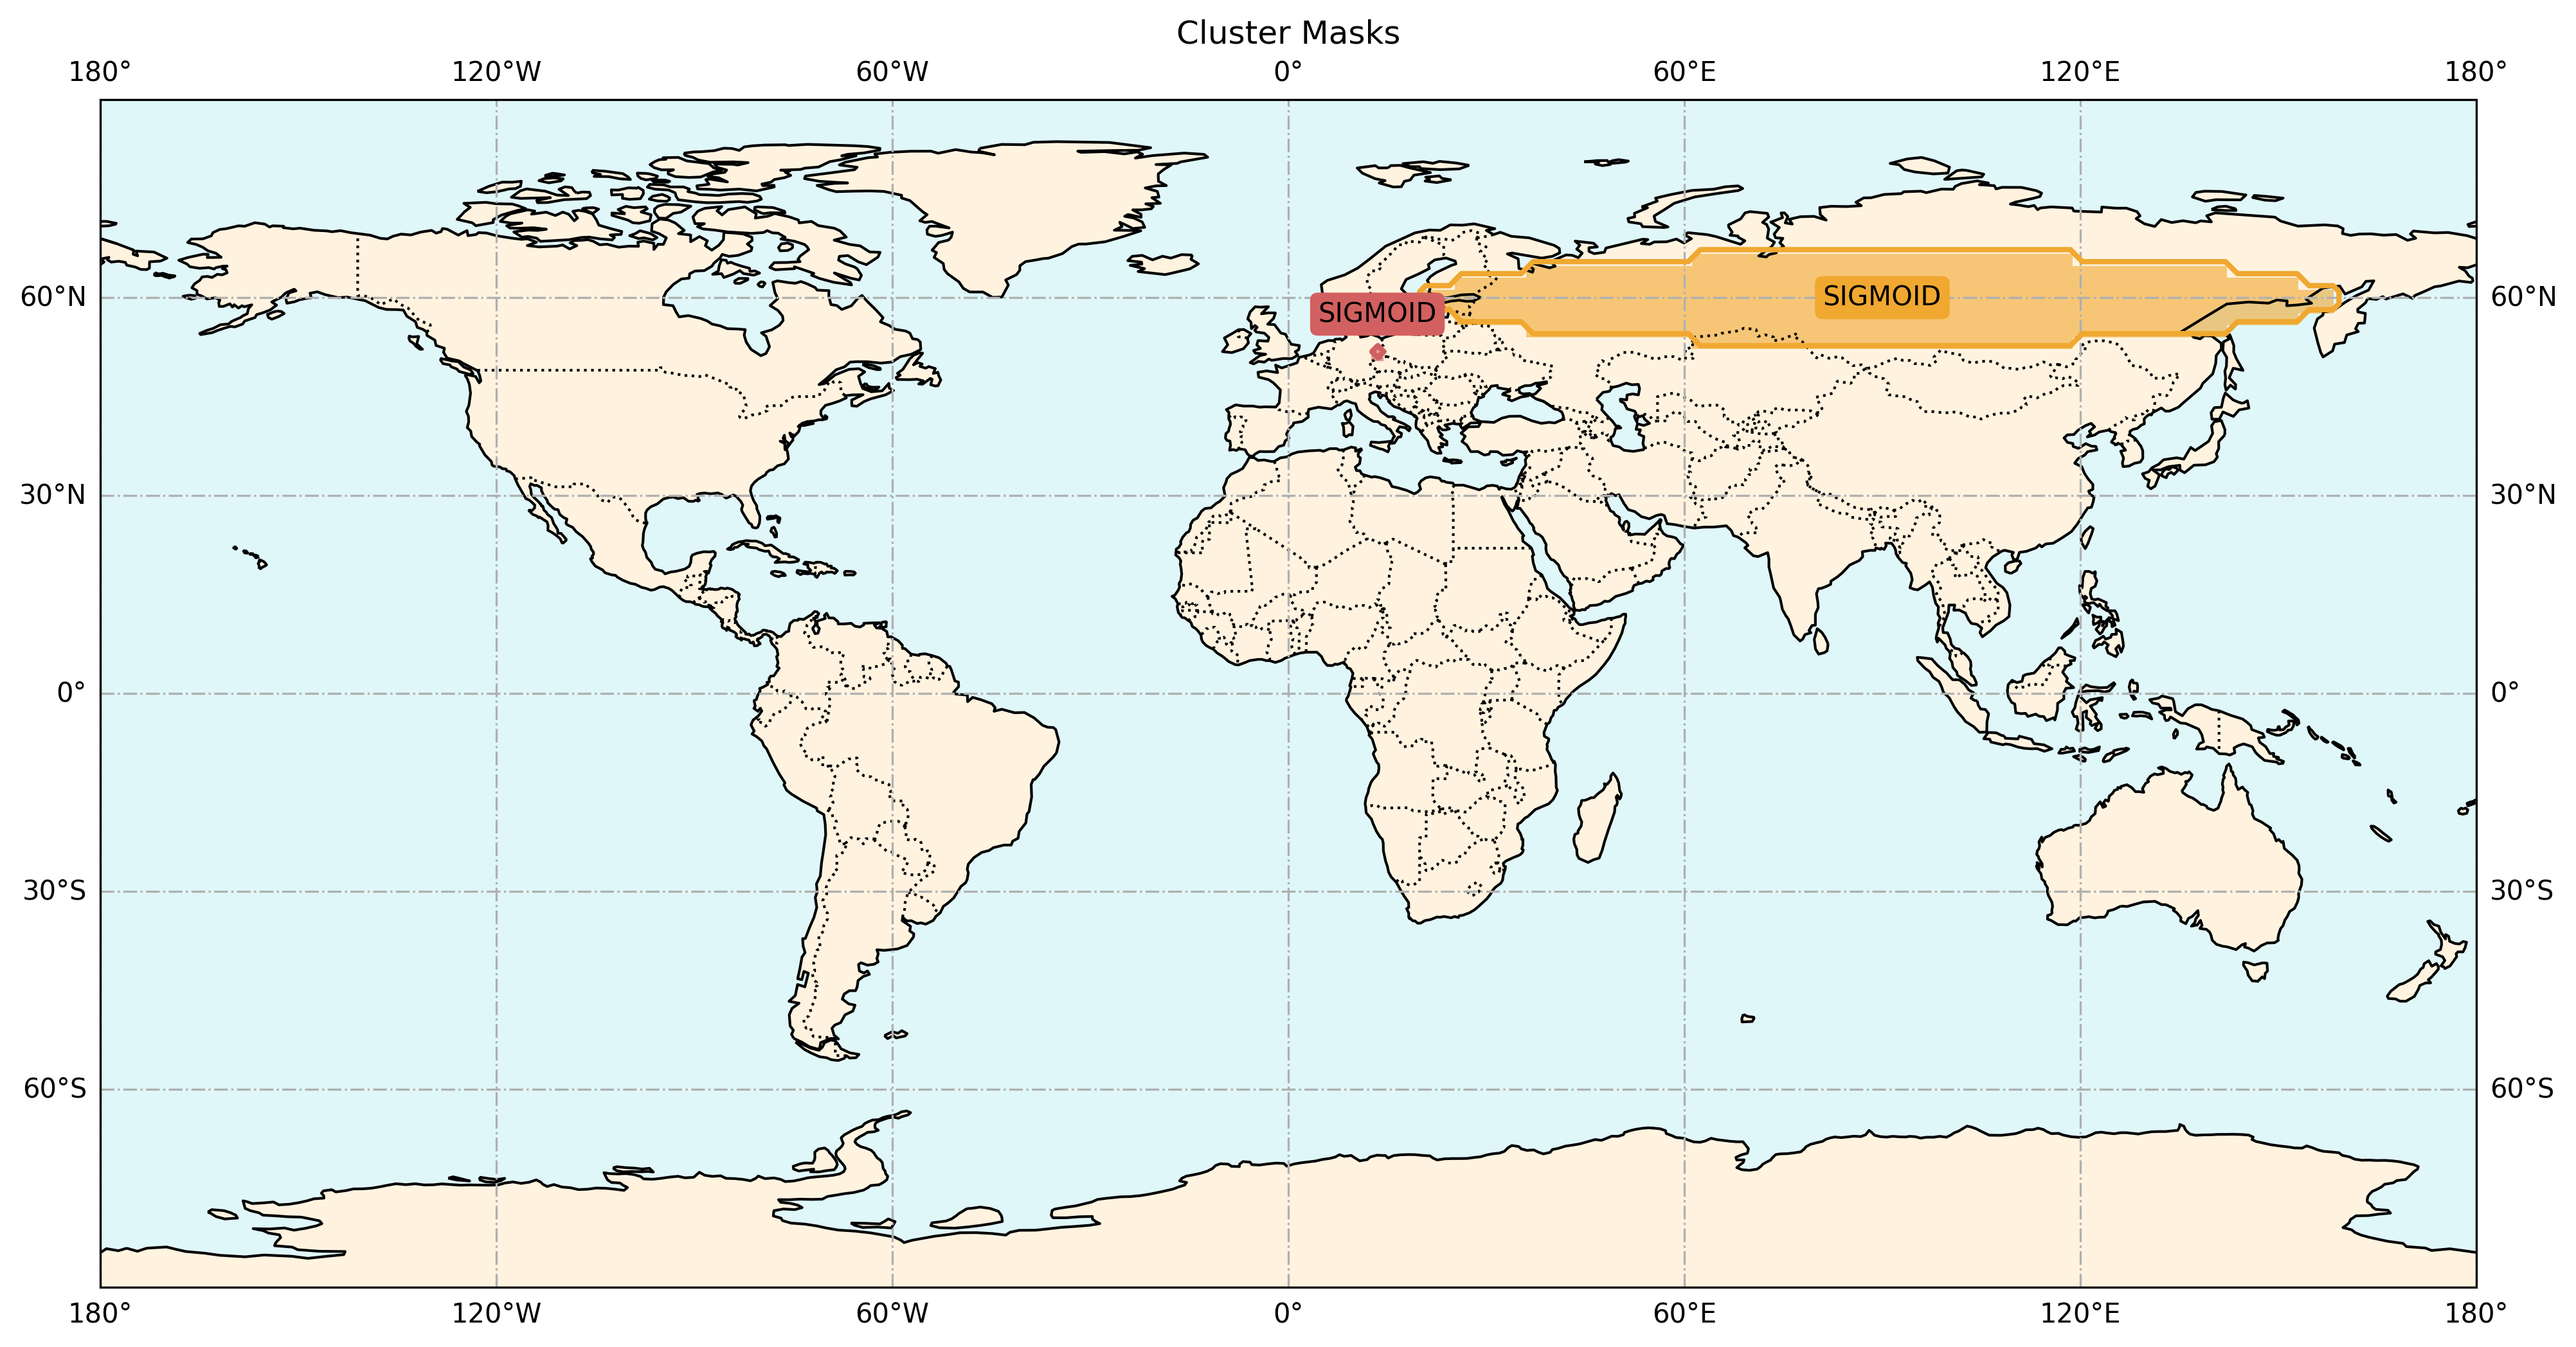

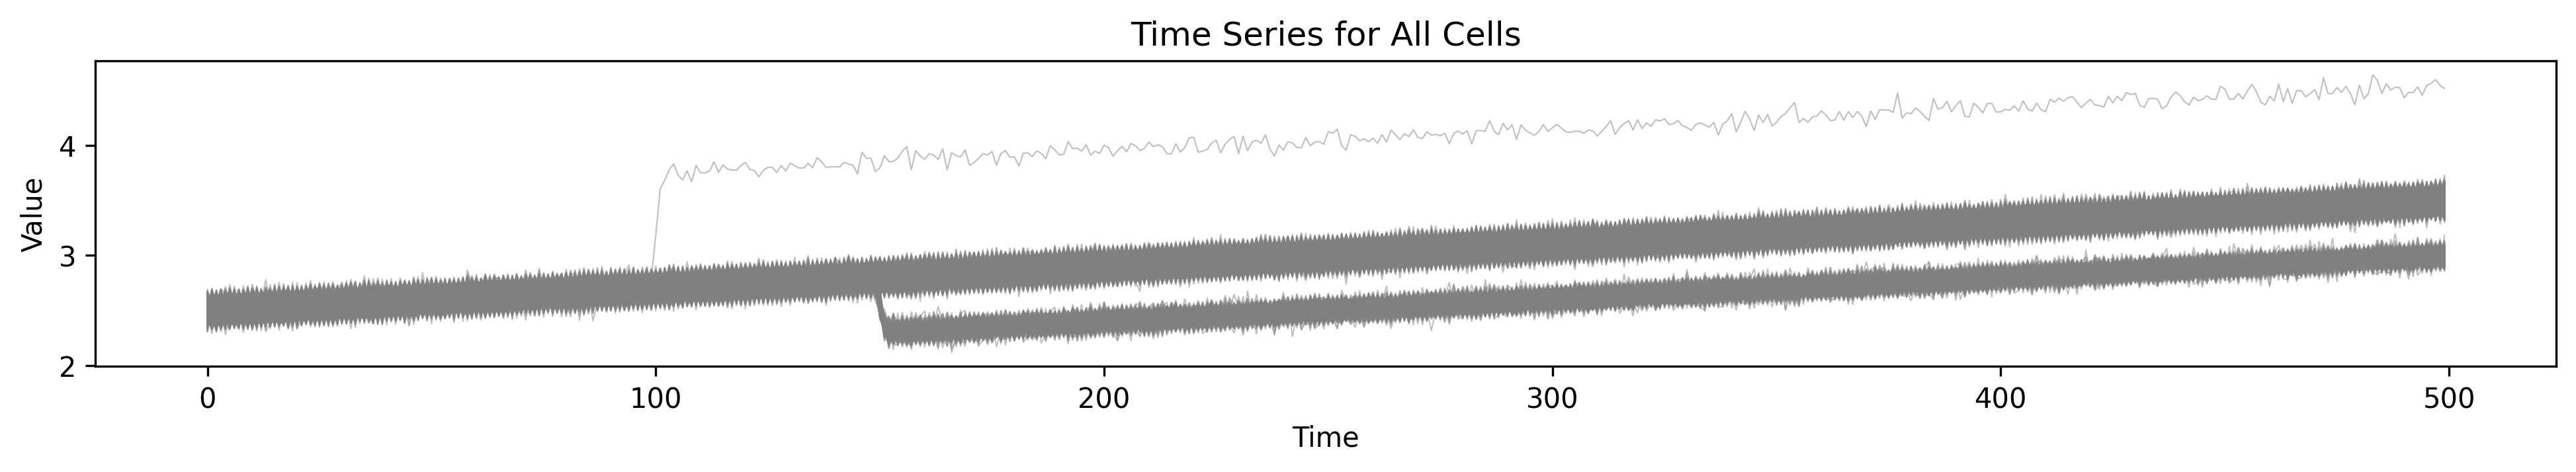

In [5]:
from ponds.shapegen import ELLIPSIS
from ponds.shiftgen import SIGMOID

center_lat = 60
center_lon = 90
ecc_lat = 7
ecc_lon = 70
central_time = 150

pd.add_shift(
    shape_method=ELLIPSIS(
        center_lat=center_lat,
        center_lon=center_lon,
        ecc_lat=ecc_lat,
        ecc_lon=ecc_lon,
    ),
    shift_method=SIGMOID(
        central_time=central_time,
        shift_magnitude=-0.5,
        shift_seed=1,
    ),
)

fig1, ax1 = pd.worldmap(
    shift_type=True,
)
#fig2, ax2 = pd.plot_all_ts()

---



In [ ]:
from ponds.shapegen import BLOB

center_lat = 55
center_lon = -35
size = 4
shape_seed = 2
central_time = 200

pd.add_shift(
    shape_method=BLOB(
        center_lat=center_lat,
        center_lon=center_lon,
        size=size,
        shape_seed=shape_seed,
    ),
    shift_method=SIGMOID(
        shift_seed=3,
        central_time=central_time,
    )
)

fig1, ax1 = pd.worldmap(
    shift_type=True,
)
fig2, ax2 = pd.plot_all_ts()